## Feature Selection

### Dataset : Pima Indians Diabetes Database

This dataset is taken originally from the National Institute of Diabetes, Digestive and Kidney Diseases.

Diabetes is one of the fastest growing chronic life threatening diseases that have already affected 422 million people worldwide according to the report of World Health Organization (WHO), in 2018. Due to the presence of a relatively long asymptomatic phase, early detection of diabetes is always desired for a clinically meaningful outcome. Around 50% of all people suffering from diabetes are undiagnosed because of its long-term asymptomatic phase.

The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The dataset consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on. 

There are 768 observations and 8 independent variables in the dataset. The target variable indicates the test result of the patient. It is 1 when the test result is positive and 0 when the test result is negative. 

### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import missingno as mno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

### Loading the dataset

In [2]:
location=("C:\\Users\\krishna meghana\\Downloads\\diabetes.csv")
data = pd.read_csv(location)

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print("The shape of the data is ",data.shape)

The shape of the data is  (768, 9)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The diabetes dataset contains 768 rows and 9 features including the target variable in which all are numeric in nature. No categorical features exist. But there are some features which can be turned into categorical, like Glucose level, BMI, Age groups.

Outcome is the target variable which has values 0 and 1 indicating whether the patient has diabetes or not.

#### Description of the Attributes:

- Pregnancies --- Number of times pregnant
- Glucose --- The blood plasma glucose concentration after a 2 hour oral glucose tolerance test (mg/dL)
- BloodPressure --- Diastolic blood pressure (mm/Hg)
- SKinThickness --- Skinfold Triceps skin fold thickness (mm)
- Insulin --- 2 Hour serum insulin (mu U/ml)
- BMI --- Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction --- A function that determines the risk of type 2 diabetes based on family history, the larger the function, the higher the risk of type 2 diabetes.
- Age 
- Outcome --- Whether the person is diagnosed with type 2 diabetes (1 = yes, 0 = no)

The dataset have nine attributes(parameters) in which there are eight independent variables (Pregnancies,Glucose,Blood Pressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age) and one dependent variable (Outcome)

### Checking for missing values

In [6]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#### There are no missing values in the dataset but if we observe the dataset, we can see that lots of features have 0 values.

For example in BloodPressure, BMI, Glucose, Insulin etc having 0 for those features make no sense like having 0 bloodpressure or BMI etc.

It appears as if zero was used as a imputer value in original data for missing values. We can treat them as missing and impute with proper values.

It is better to replace zeros with NaN because counting them would be easier and need to be replaced with suitable values.

In [8]:
#Replacing zeroes with Nan value

data_copy = data.copy(deep = True)
data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans

print(data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


We can see that the features Glucose, BloodPressure, SkinThickness, Insulin, BMI have missing values.

In [9]:
#Percentage of NaNs in each column

round(data_copy.isnull().sum()/len(data_copy)*100,2)

Pregnancies                  0.00
Glucose                      0.65
BloodPressure                4.56
SkinThickness               29.56
Insulin                     48.70
BMI                          1.43
DiabetesPedigreeFunction     0.00
Age                          0.00
Outcome                      0.00
dtype: float64

Insulin column has almost 50% of the values as missing. It would be hard to treat these outliers for model building.

In [10]:
#For easy access, renaming data_copy as df
df=data_copy


The missing values can either be imputed with mean or median or any value or they can be deleted from the dataset for further analysis. Here, we are trying to replace them with mean and median values according to their distribution.

In [11]:
#Checking the skewness of data

df.skew()

Pregnancies                 0.901674
Glucose                     0.530989
BloodPressure               0.134153
SkinThickness               0.690619
Insulin                     2.166464
BMI                         0.593970
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

For highly skewed values we'll impute the column with median else mean.

Glucose, BloodPressure, SkinThickness, Insulin, BMI are the columns with missing values.

In [12]:
# Highly skewed
df['BMI'].fillna(df['BMI'].median(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)

#Normal
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)


In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.25000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.000000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.000000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.300000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.00


 Missing values have been handled.

In [14]:
df.duplicated().sum()

0

There are no duplicate values in the data

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


There are no categorical variables in the data except the target variable which is Outcome. 
It has the values 0 and 1 which represent if a patient is non-diabetic or diabetic.

### Viewing the target variable

In [16]:
print("Number of samples for Outcome 0 are : ",len(data_copy[data_copy['Outcome']==0]))
print("Number of samples for Outcome 1 are : ",len(data_copy[data_copy['Outcome']==1]))

Number of samples for Outcome 0 are :  500
Number of samples for Outcome 1 are :  268


<AxesSubplot:xlabel='Outcome', ylabel='count'>

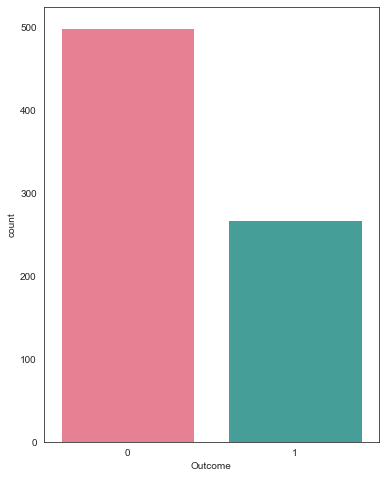

In [17]:
plt.figure(figsize=(6,8))
sns.set_style(style='white')
sns.countplot(data_copy['Outcome'],palette="husl")

The Outcome parameter shows that there are 500 healthy people and 268 Diabetic people.It means that 65% people are diabetic and 34.9% people are healthy.

#### Classes are imbalanced. The Data is biased towards people who are non-diabetics

## Feature Selection

### 1. Plotting a correlation matrix to understand the relationship between variables.

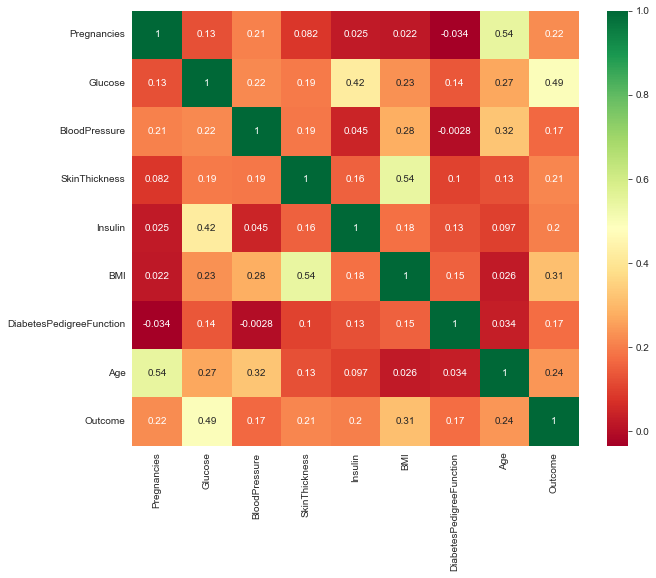

In [18]:
sns.heatmap(df[df.columns].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

- Glucose shows positive weak linear association with other variable in given dataset. That means On increasing Glucose level in patients, Other characteristics will also increase. 

- BloodPressure shows positive weak linear association with other variable in given dataset. That means On increasing BP level in patients, Other variables will also increase.

- SkinThickness shows positive weak linear association with other variable in given dataset ,(Except with Age). That means On increasing SkinThickness in patients, Other variables will also increase. SkinThickness with Age shows a weak negative correlation, that means on increasing SkinThickness , Age must decrease.

- Insulin shows positive weak linear association with other variable in given dataset ,(Except with Age). That means On increasing Insulin level in patients, Other variables will also increase. Insulin with Age shows a weak negative correlation, that means on increasing SkinThickness , Age must decrease.

- BMI shows positive weak linear association with other variable in given dataset. That means On increasing BMI level in patients, Other variables will also increase.

- DiabetesPedigreeFunction shows positive weak linear association with other variable in given dataset. That means On increasing DPF in patients, Other variables will also increase.


In [19]:
c=df.corrwith(df['Outcome'],axis = 0).sort_values(ascending=False)
c

Outcome                     1.000000
Glucose                     0.492928
BMI                         0.312038
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.214873
Insulin                     0.203790
DiabetesPedigreeFunction    0.173844
BloodPressure               0.166074
dtype: float64

It appears Insulin, DiabetesPedigreefunction and Blood Pressure have not much affect on the Outcome variable.

Also, after looking at the boxplots of all the variables, it was observed that Insulin variable has many outliers. It may interfere with the modelling and give inaccurate results. It seems logical to remove this feature from the analysis. It also had many missing values which was later imputed with median.

But it seems logical to first check the impact of it on Outcome and then decide.

### 2. Information criteria viz entropy, Gini index, gain ratio etc.

In [20]:
#Splitting the dataset into X and y
X=df.drop(columns = ['Outcome'])
y=df['Outcome']

In [21]:
# splitting the data into testing and training data.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

__Mutual Information__

Mutual information is always larger than or equal to zero, where the larger the value, the greater the relationship between the two variables. If the calculated result is zero, then the variables are independent.

In [22]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X_train, y_train,random_state=35)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Glucose                     0.107472
BMI                         0.069186
Age                         0.067814
Pregnancies                 0.026313
BloodPressure               0.022196
Insulin                     0.007430
SkinThickness               0.000000
DiabetesPedigreeFunction    0.000000
dtype: float64

<AxesSubplot:title={'center':'Feature Selection through Mutual Information'}>

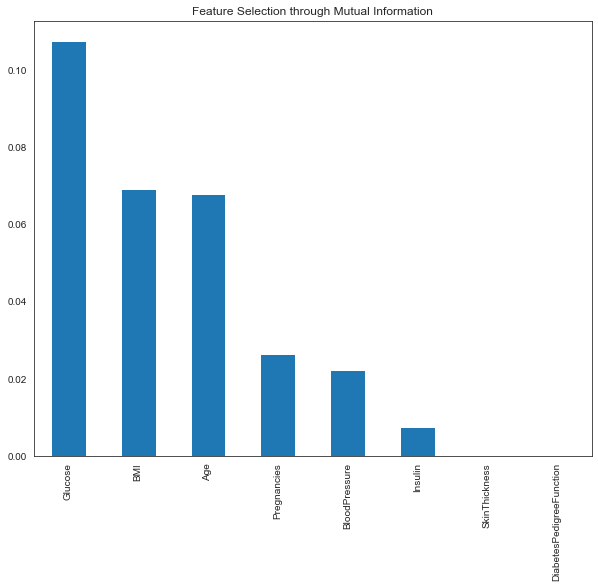

In [23]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(10, 8),title="Feature Selection through Mutual Information")


Glucose has highest impact on the Outcome and Insulin has the least. Skin Thickness and Diabetes pedigree function seem to have no relationship at all.

In [24]:
val=mutual_info>0.05
X_train_mi=X.loc[:,val]
X_train_mi.head()

,Glucose,BMI,Age
0,148.0,33.6,50
1,85.0,26.6,31
2,183.0,23.3,32
3,89.0,28.1,21
4,137.0,43.1,33


__Fitting a Decision Tree Classifier__

Parameter used in Decision tree classifier:

criterion{“gini”, “entropy”}, default=”gini”

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

A tree is composed of nodes, and those nodes are chosen looking for the optimum split of the features. For that purpose, different criteria exist. In the decision tree Python implementation of the scikit-learn library, this is made by the parameter ‘criterion‘. This parameter is the function used to measure the quality of a split and it allows users to choose between ‘gini‘ or ‘entropy‘.

__Gini Index__

In [25]:
from sklearn.tree import DecisionTreeClassifier
dtc_gini = DecisionTreeClassifier(criterion = 'gini', random_state = 12) 
dtc_gini.fit(X_train, y_train)
# predicting result
y_pred = dtc_gini.predict(X_test)

In [26]:
#Feature Importance
gini=pd.Series(dtc_gini.feature_importances_,index=X_train.columns).sort_values(ascending=False)
gini

Glucose                     0.317332
BMI                         0.189236
Age                         0.148726
DiabetesPedigreeFunction    0.102471
BloodPressure               0.101792
Insulin                     0.064435
SkinThickness               0.055267
Pregnancies                 0.020741
dtype: float64

<AxesSubplot:title={'center':'Feature Selection through Gini index'}>

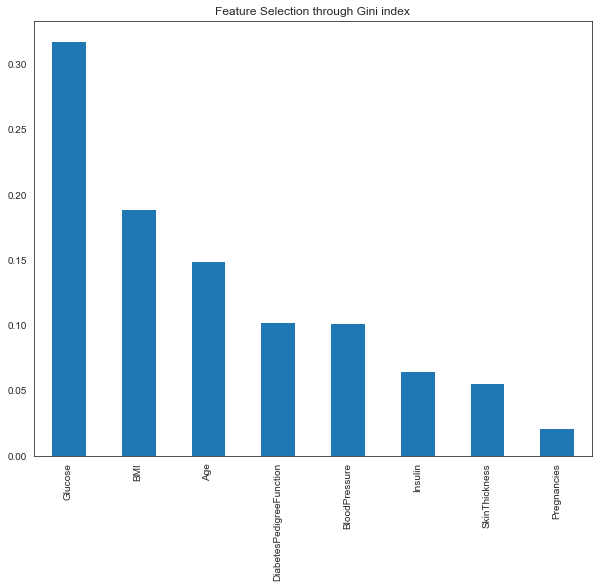

In [27]:
# plot feature importance
gini.plot.bar(figsize=(10,8),title="Feature Selection through Gini index")

In [28]:
val_g = gini> 0.1
X_train_gini=X.loc[:,val_g]
X_train_gini.head()

,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,148.0,72.0,33.6,0.627,50
1,85.0,66.0,26.6,0.351,31
2,183.0,64.0,23.3,0.672,32
3,89.0,66.0,28.1,0.167,21
4,137.0,40.0,43.1,2.288,33


__Entropy__

Entropy can be defined as a measure of the purity of the sub split. The algorithm calculates the entropy of each feature after every split and as the splitting continues on, it selects the best feature and starts splitting according to it. 

In [29]:
dtc_ent = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtc_ent.fit(X_train, y_train)

# predicting result
y_pred = dtc_ent.predict(X_test)

In [30]:
ent=pd.Series(dtc_ent.feature_importances_,index=X_train.columns)
ent

Pregnancies                 0.068032
Glucose                     0.286040
BloodPressure               0.071596
SkinThickness               0.085311
Insulin                     0.052290
BMI                         0.180359
DiabetesPedigreeFunction    0.115901
Age                         0.140470
dtype: float64

<AxesSubplot:title={'center':'Feature Selection through Entropy'}>

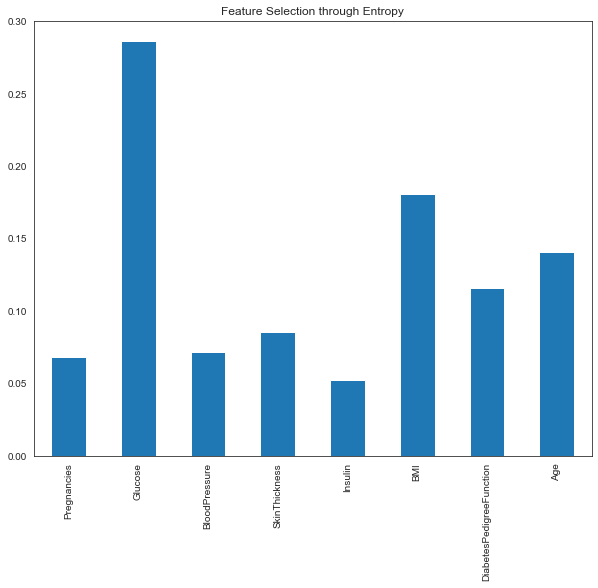

In [31]:
# plot feature importance
ent.plot.bar(figsize=(10,8),title="Feature Selection through Entropy")

In [32]:
val_e = ent> 0.1
X_train_ent=X.loc[:,val_e]
X_train_ent.head()

,Glucose,BMI,DiabetesPedigreeFunction,Age
0,148.0,33.6,0.627,50
1,85.0,26.6,0.351,31
2,183.0,23.3,0.672,32
3,89.0,28.1,0.167,21
4,137.0,43.1,2.288,33


__Gini Index has values inside the interval [0, 0.5] whereas the interval of the Entropy is [0, 1].__

Computationally, entropy is more complex since it makes use of logarithms and consequently, the calculation of the Gini Index will be faster.

### 3. Accuracy based

####  Random Forest Classifier to understand the feature importance

In [33]:
from sklearn.ensemble import RandomForestClassifier 
rfc= RandomForestClassifier(random_state=0)

rfc.fit(X_train,y_train)

rf=pd.Series(rfc.feature_importances_,index=X_train.columns).sort_values(ascending=False)
rf

Glucose                     0.249811
BMI                         0.157030
Age                         0.145468
DiabetesPedigreeFunction    0.123688
Insulin                     0.088038
BloodPressure               0.083435
Pregnancies                 0.077664
SkinThickness               0.074865
dtype: float64

As it can be seen, the Glucose variable has the highest value followed by BMI. This ranking is ordered according to the importance of how they affect the Outcome variable.



<AxesSubplot:title={'center':'Feature Selection through Random Forest Classifier'}>

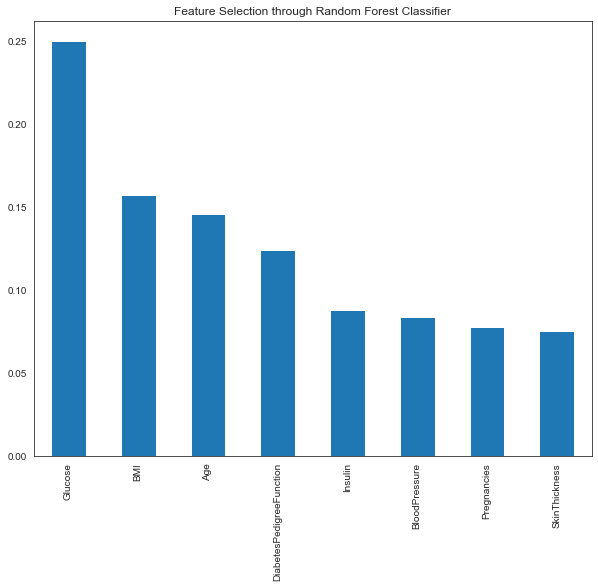

In [34]:
# plot feature importance
rf.plot.bar(figsize=(10,8),title="Feature Selection through Random Forest Classifier")

In [35]:
val_rf = rf> 0.1
X_train_rf=X.loc[:,val_rf]
X_train_rf.head()

,Glucose,BMI,DiabetesPedigreeFunction,Age
0,148.0,33.6,0.627,50
1,85.0,26.6,0.351,31
2,183.0,23.3,0.672,32
3,89.0,28.1,0.167,21
4,137.0,43.1,2.288,33


__Recursive Feature Elimination using Random Forest Classifier__

RFE (Recursive feature elimination) feature selection technique removes the attributes recursively and builds the model with remaining attributes.

In [36]:
from sklearn.feature_selection import RFE
# Wrap the feature eliminator around the random forest model
rfe = RFE(estimator=rfc, n_features_to_select=4, verbose=1)
 
# Fit the model to the training data
rfe.fit(X_train, y_train)
 
# Create a mask using an attribute of rfe
mask = rfe.support_
 
# Apply the mask to the feature dataset X and print the result
X_train_rfe=X.loc[:,mask]
print(X_train_rfe.columns)

Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Index(['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')


In [37]:
X_train_rfe.head()

,Glucose,BMI,DiabetesPedigreeFunction,Age
0,148.0,33.6,0.627,50
1,85.0,26.6,0.351,31
2,183.0,23.3,0.672,32
3,89.0,28.1,0.167,21
4,137.0,43.1,2.288,33


__Extra trees classifier__

In [38]:
from sklearn.ensemble import ExtraTreesClassifier
classifiern = ExtraTreesClassifier()
classifiern.fit(X_train,y_train)
score = classifiern.feature_importances_

extra=pd.Series(score,index=X_train.columns).sort_values(ascending=False)
extra

Glucose                     0.251612
Age                         0.143064
BMI                         0.133129
DiabetesPedigreeFunction    0.113007
Pregnancies                 0.100708
BloodPressure               0.089840
Insulin                     0.087073
SkinThickness               0.081567
dtype: float64

<AxesSubplot:title={'center':'Feature Selection through Extra Trees Classifier'}>

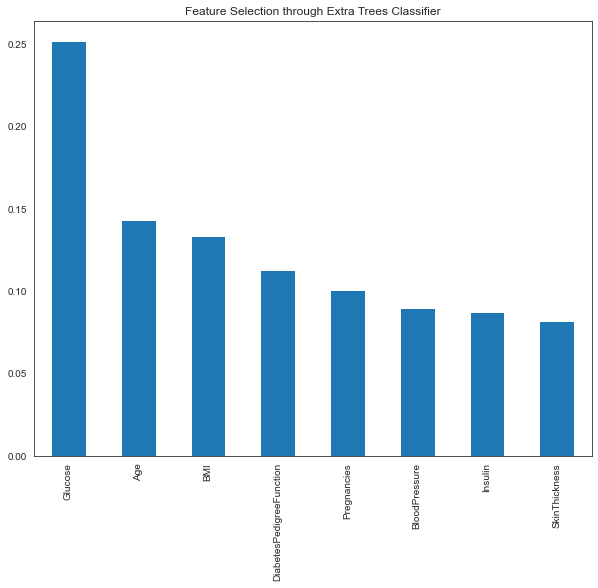

In [39]:
# plot feature importance
extra.plot.bar(figsize=(10,8),title="Feature Selection through Extra Trees Classifier")

In [40]:
#Selecting only the important variables
val_extra = extra> 0.1
X_train_extra=X_train.loc[:,val_extra]
X_train_extra.head()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age
580,0,151.0,42.1,0.371,21
418,1,83.0,18.2,0.624,27
764,2,122.0,36.8,0.340,27
363,4,146.0,38.5,0.520,67
757,0,123.0,36.3,0.258,52


#### Observing the scores of all above used methods, it appears Glucose has highest impact on the target variable.

#### Glucose, BMI, DiabetesPedigreeFunction and Age are important features for classifying if a person is diabetic or not. So, we use only these variables to fit the classfication model and check their effect on Outcome.